Exercise 7:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import networkx as nx
import random
from src.my_random.sales import*

a)

In [3]:
n = 20
stations = gen_stations(n)
route = np.arange(0,n)
random.shuffle(route)
cost = euclDist(stations[:,route[n-1]],stations[:,route[0]])

Total cost of this route: 2410.3705531657756


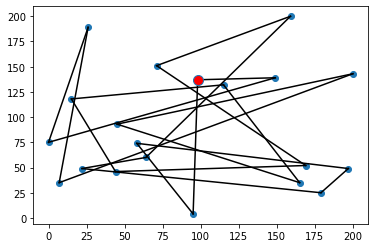

In [4]:

plt.figure()
plt.plot([stations[0,route[0]],stations[0,route[n-1]]],[stations[1,route[0]],stations[1,route[n-1]]],'k')
for i in range(n-1):
    cost += euclDist(stations[:,route[i]],stations[:,route[i+1]])
    plt.plot([stations[0,route[i]],stations[0,route[i+1]]],[stations[1,route[i]],stations[1,route[i+1]]],'k')
plt.scatter(stations[0,:],stations[1,:])
plt.plot(stations[0,0],stations[1,0],marker='o',markerfacecolor='red',markersize=10)

print('Total cost of this route:',cost)

b)

In [5]:
df = pd.read_csv(r'C:/Users/lenovo/Documents/DTU/02443/cost.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,225,110,8,257,22,83,231,277,243,94,30,4,265,274,250,87,83,271,86
1,255,0,265,248,103,280,236,91,3,87,274,265,236,8,24,95,247,259,28,259
2,87,236,0,95,248,110,25,274,250,271,9,244,83,250,248,280,29,26,239,7
3,8,280,83,0,236,28,91,239,280,259,103,23,6,280,244,259,95,87,230,84
4,268,87,239,271,0,244,275,9,84,25,244,239,275,83,110,24,274,280,84,274
5,21,265,99,29,259,0,99,230,265,271,87,5,22,239,236,250,87,95,271,91
6,95,236,28,91,247,93,0,247,259,244,27,91,87,268,275,280,7,8,240,27
7,280,83,250,261,4,239,230,0,103,24,239,261,271,95,87,21,274,255,110,280
8,247,9,280,274,84,255,259,99,0,87,255,274,280,3,27,83,259,244,28,274
9,230,103,268,275,23,244,264,28,83,0,268,275,261,91,95,8,277,261,84,247


In [46]:
w = np.zeros(n)
for l in range(n):
    w[l] = np.sum(df.values[l,:])

e = list(range(0,n,1))
pointA = random.choices(e,weights=1/w)
print('Route:',route)
indexA = np.where(route==pointA)[0]
print('A:',pointA,', index:',indexA)

Route: [ 9 11  6  8  4 15  1 19 12 17 14 16  2 10  7  5 18 13  3  0]
A: [0] , index: [19]


<ipython-input-66-b04bce06d701>:20: RuntimeWarning: divide by zero encountered in true_divide
  pointB = random.choices(e,weights=T/df.values[:,pointA])


The estimated optimal route follows this sequence: [ 0  4  3 12  7 10  8  2 18 11 15 13  6 17  9 14  5 19 16  1] and entails the following cost: 1912


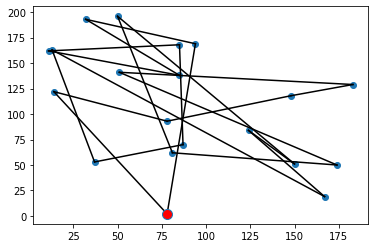

In [66]:

n = 20
iterations = 1000
permutations = 2
stations = gen_stations(n)
route = np.arange(0,n)
optRoute = route
random.shuffle(route)
k = 0
costMin = np.sum(np.sum(df.values))
for h in range(iterations):
    T=1/np.sqrt(1+k)
    #T=-np.log(1+k)
    k+=1
    for j in range(permutations):
        w = np.zeros(n)
        e = list(range(0,n,1))
        for l in range(n):
            w[l] = np.sum(df.values[l,:])
        pointA = random.choices(e,weights=T/w)
        pointB = random.choices(e,weights=T/df.values[:,pointA])
        indexA = np.where(route==pointA)[0]
        indexB = np.where(route==pointB)[0]
        route[indexA], route[indexB] = route[indexB], route[indexA]

    cost = df.values[route[len(route)-1]][route[0]]
    for i in range(len(route)-1):
        cost += df.values[route[i]][route[i+1]]
    if cost<costMin:
        costMin = cost
        optRoute = route
    else:
        route = optRoute


print('The estimated optimal route follows this sequence:', optRoute,'and entails the following cost:',costMin)
plt.figure()
plt.plot([stations[0,route[0]],stations[0,route[n-1]]],[stations[1,route[0]],stations[1,route[n-1]]],'k')
for i in range(n-1):
    plt.plot([stations[0,route[i]],stations[0,route[i+1]]],[stations[1,route[i]],stations[1,route[i+1]]],'k')
plt.scatter(stations[0,:],stations[1,:])
plt.plot(stations[0,0],stations[1,0],marker='o',markerfacecolor='red',markersize=10)